In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like:")
situation = maze.reset()
maze.render()


This is how maze looks like:

□ □ □ □ □
□ ■ ■ $ □
□ ■ ■ ■ □
□ ■ ■ ■ X
□ □ □ □ □


In [3]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [4]:
cfg = Configuration(number_of_actions=8,
                    max_population=1800,
                    learning_rate=0.2,
                    mutation_chance=0.08,
                    chi=0.8,
                    ga_threshold=25,
                    deletion_threshold=25,
                    delta=0.1,
                    initial_error=0.01,
                    metrics_trial_frequency=50,
                    covering_wildcard_chance = 0.9,
                    user_metrics_collector_fcn=xcs_maze_metrics,
                    lmc=10,
                    lem=200
                   )


In [5]:
agent = XNCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 3000, True)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 12, 'reward': [0, 0, 0, 0, 0, 2.1332401280982545e-40, 1.9720619850863863e-40, 200.0], 'numerosity': 51, 'population': 51, 'average_specificity': 1.8627450980392157, 'fraction_accuracy': 0.16488095238095238}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 9, 'reward': [3.242513785040816, 4.007511220460857, 3.755400723031541, 5.718705424140142, 203.99357594410674, 4.16502083955891, 131.8650716024955, 251.6666137052352], 'numerosity': 299, 'population': 133, 'average_specificity': 1.7759197324414715, 'fraction_accuracy': 0.025498295364304785}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial': 6, 'reward': [12.027011313229846, 5.781253374659476, 2.089086454040064, 1.0849649364456135, 1.03967442216596, 1.432177796361129, 12.922073032888735, 746.5488957150206], 'numerosity': 315, 'population': 134, 'average_specificity': 1.7333333333333334, 'fraction_accuracy': 0.035467335107153226}
INFO:lcs.agents.Agent:{'trial': 900, 'steps_in

In [6]:
for cl in explore_population:
    print(str(cl))

Cond:.O...... - Act:0 - Num:3 [fit: 0.000, exp: 33.00, pred: 212.399]
Cond:.O...#.. - Act:1 - Num:3 [fit: 0.000, exp: 34.00, pred: 197.219]
Cond:#O.#.#.. - Act:2 - Num:3 [fit: 0.000, exp: 113.00, pred: 233.260]
Cond:#O...O.. - Act:3 - Num:3 [fit: 0.151, exp: 10.00, pred: 304.418]
Cond:.O.#..#. - Act:4 - Num:3 [fit: 0.000, exp: 121.00, pred: 207.194]
Cond:.O.##.#. - Act:5 - Num:3 [fit: 0.000, exp: 187.00, pred: 217.179]
Cond:.O...... - Act:6 - Num:3 [fit: 0.000, exp: 27.00, pred: 196.817]
Cond:.O..#... - Act:7 - Num:3 [fit: 0.000, exp: 329.00, pred: 322.857]
Cond:..##..#O - Act:0 - Num:3 [fit: 0.000, exp: 57.00, pred: 206.864]
Cond:......OO - Act:1 - Num:1 [fit: 0.000, exp: 50.00, pred: 205.185]
Cond:......OO - Act:2 - Num:1 [fit: 0.000, exp: 72.00, pred: 203.155]
Cond:.#....OO - Act:3 - Num:3 [fit: 0.000, exp: 116.00, pred: 210.454]
Cond:.....#OO - Act:4 - Num:2 [fit: 0.000, exp: 591.00, pred: 424.178]
Cond:..##...O - Act:5 - Num:3 [fit: 0.001, exp: 415.00, pred: 295.250]
Cond:#...#.O#

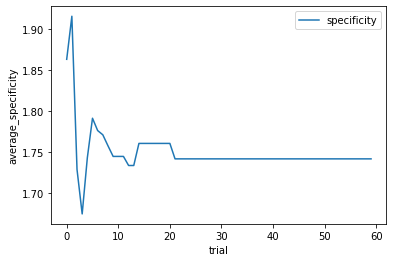

In [7]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["average_specificity"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


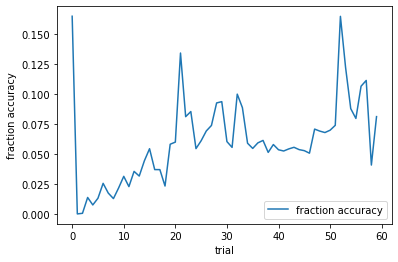

In [8]:
df = pd.DataFrame(metric["fraction_accuracy"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])


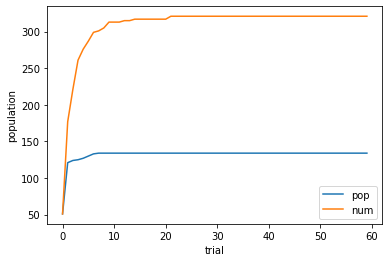

In [9]:

df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []


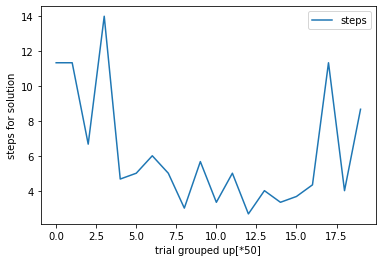

In [10]:


xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
# df = pd.DataFrame(metric["steps_in_trial"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial grouped up[*50]")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])
